In [17]:
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [21]:
df.rename(columns={'y':'deposit'}, inplace=True)

In [22]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [23]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 31647 rows.


In [24]:
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

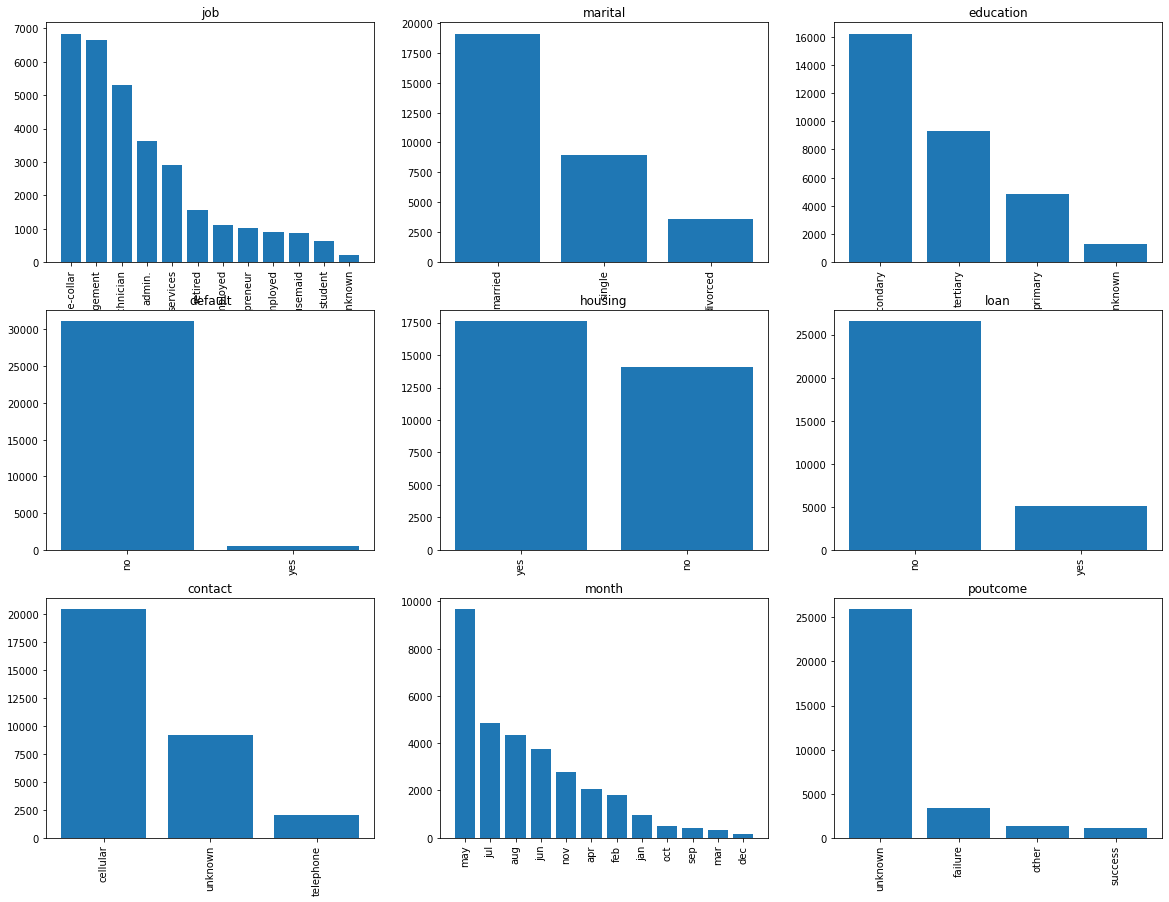

In [25]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

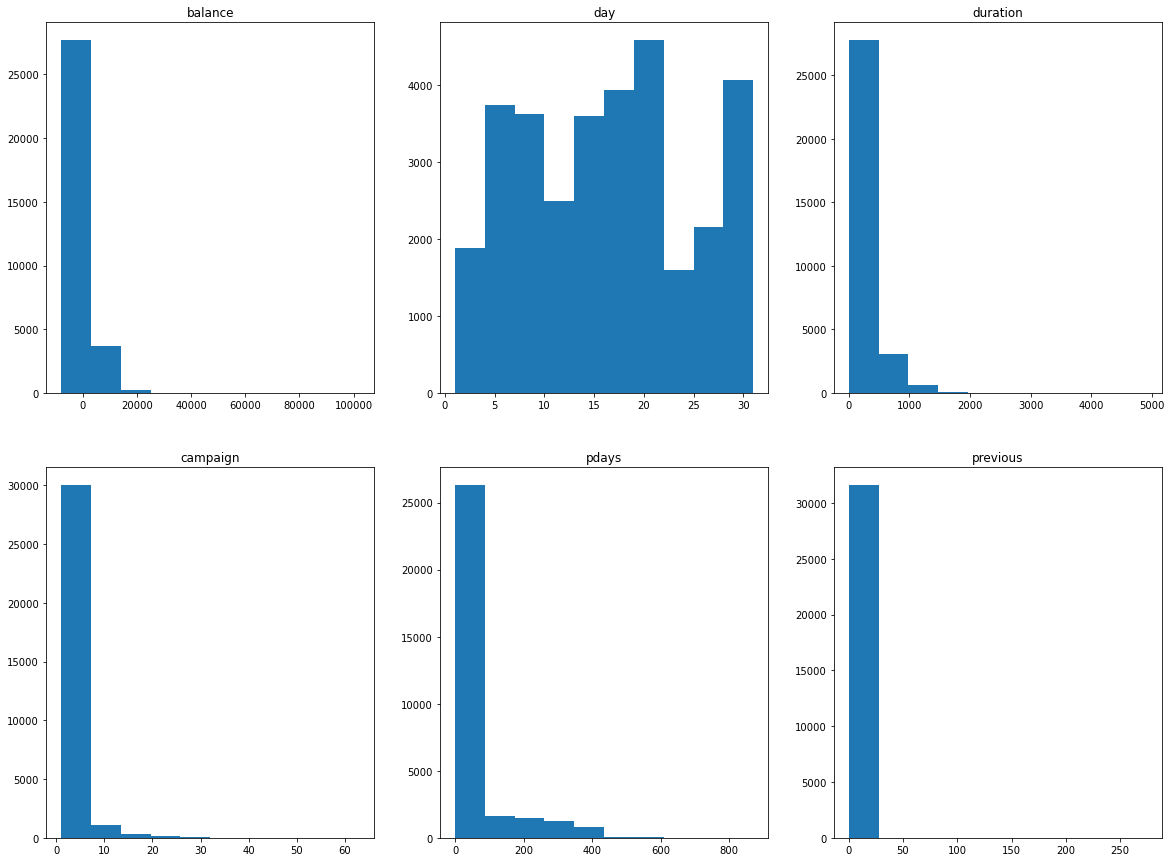

In [27]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [13]:
y_test_pred = rfc.predict(X_test)
test_data['subscribed'] = y_test_pred
test_data[['ID', 'subscribed']].to_csv('termdeposit_submission.csv', index=False)

In [28]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,31647.000000,31647.000000,31647.000000
mean,39.576042,2.765697,0.574272
std,99.317592,3.113830,2.422529
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [29]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.5024172907384586

In [30]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.05687742914020287

In [31]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.018959143046734288

In [41]:
print(df.columns)

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [42]:
df.empty

False

In [44]:
# Handling missing values
train_data.isnull().sum()

# Categorical Encoding
from sklearn.preprocessing import LabelEncoder

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
le = LabelEncoder()

for col in cat_cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['age', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(train_data[['age', 'duration', 'campaign', 'pdays', 'previous']])
test_data[['age', 'duration', 'campaign', 'pdays', 'previous']] = scaler.transform(test_data[['age', 'duration', 'campaign', 'pdays', 'previous']])

# Feature Selection
X_train = train_data.drop(['ID', 'subscribed'], axis=1)
y_train = train_data['subscribed']
X_test = test_data.drop(['ID'], axis=1)


In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rfc.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[27932     0]
 [    0  3715]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     27932
         yes       1.00      1.00      1.00      3715

    accuracy                           1.00     31647
   macro avg       1.00      1.00      1.00     31647
weighted avg       1.00      1.00      1.00     31647



In [ ]:
y_test_pred = rfc.predict(X_test)
test_data['subscribed'] = y_test_pred
test_data[['ID', 'subscribed']].to_csv('termdeposit_submission.csv', index=False)